### **LUNA OR NOT**

*A Neural network to identify between my puppy Luna and other dogs.*
I Applied a convolutional neural network, training by 2 datas, one for differents dogs and other from my dog luna.

I use a model with 5 convolutional layers,a hidden layer and the output layer with 2 neurons and a sigmoid activation function.
I applied a augmentation to configurate different position of the images and train the model just with 80 epochs to have an accuaracy of 0,8.

Finally i code a widget for load the images.

Note: It is important to mention that the datas folder contains fewer than 300 files, which means that I have a small amount of data. As a result, the model may become unstable. Maybe if a would have more data i can do a validation folder and the tranining will be better.


In [21]:
import os
import random
import numpy as np
from io import BytesIO


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf


from ipywidgets import widgets

## **INSPECT THE DATA**

In [22]:
BASE_DIR = './drive/MyDrive/Colab Notebooks/Dogs'

luna_dir = os.path.join(BASE_DIR, 'Luna')
otros_dir = os.path.join(BASE_DIR, 'otros')

print(f'total training luna images: {len(os.listdir(luna_dir))}')
print(f'total training otros images: {len(os.listdir(otros_dir))}')

luna_files = os.listdir(luna_dir)
otros_files = os.listdir(otros_dir)

total training luna images: 204
total training otros images: 118


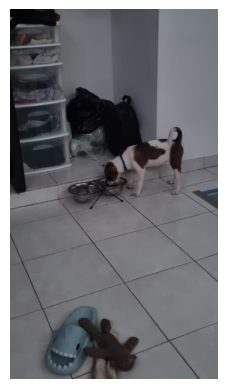

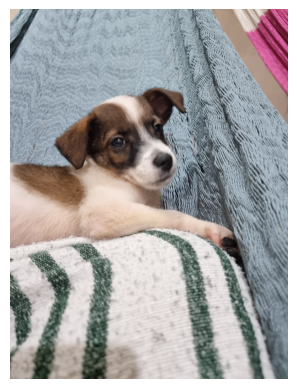

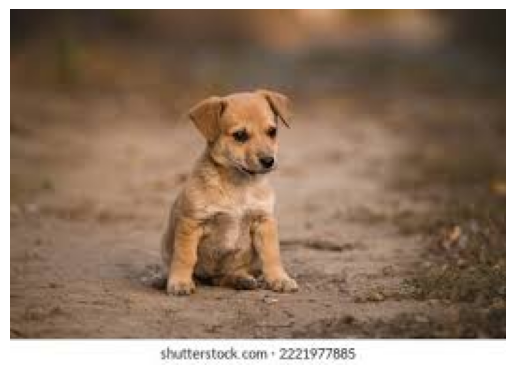

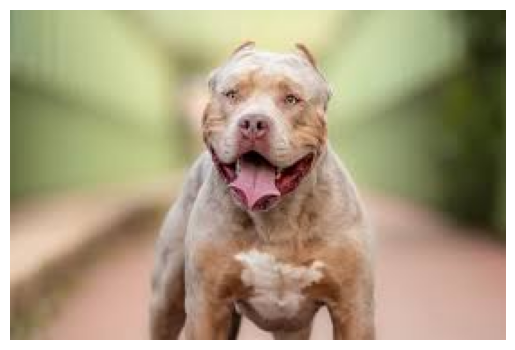

In [23]:
#IMPRIMIMOS EJEMPLOS
next_luna = [os.path.join(luna_dir, fname)
             for fname in random.sample(luna_files, k=2)]
next_otros = [os.path.join(otros_dir, fname)
             for fname in random.sample(otros_files, k=2)]

for i, img_path in enumerate(next_luna+next_otros):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

### **BUILD THE MODEL**

In [24]:
#utilizo 5 convoluciones, debido a la complicación de identificar 1 perro especifico que al ser malix tiene mezcla de razas
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. note: The input images doesn´t have the perfect size
    tf.keras.layers.Rescaling(1./255),
    # Convolutions
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # hidden layer of 512 neurons
    tf.keras.layers.Dense(512, activation='relu'),
    #a sigmoid activation with 1 neuron, because the model choose between "2" options Luna or not luna, that means is a binary choose, 0 or 1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

## **AUGMANTATION**

In [25]:
data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
    ])

model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [26]:
# compilamos
model_with_aug.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
    )
# optimizamos el entrenamiento
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

Found 322 files belonging to 2 classes.


## **TRAIN THE MODEL**

In [28]:
# Train the model
history = model_with_aug.fit(
    train_dataset_final,
    epochs=50,
    verbose = 1
)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.5048 - loss: 0.8241
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6846 - loss: 0.6431
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5871 - loss: 0.7000
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6861 - loss: 0.6503
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 0.6727
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5892 - loss: 0.6826
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6273 - loss: 0.6678
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6919 - loss: 0.5952
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6325 - loss: 0.6434
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6783 - loss: 0.6773
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6411 - loss: 0.6400
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy

## **ACCURACY**

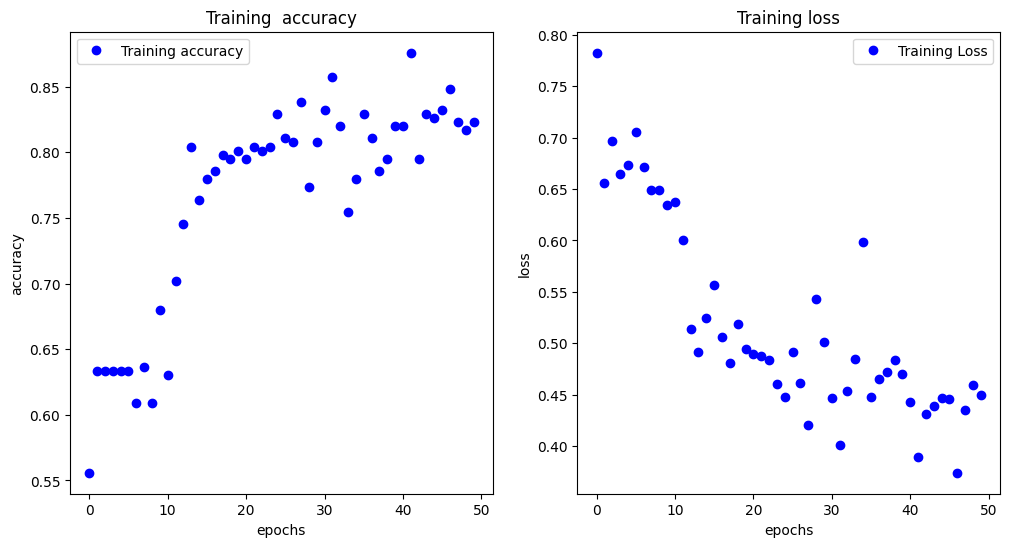

In [29]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  fig, ax = plt.subplots(1,2, figsize=(12, 6))
  ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
  ax[0].set_title('Training  accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].legend()

  ax[1].plot(epochs, loss, 'bo', label='Training Loss')
  ax[1].set_title('Training loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

  plt.show()

plot_loss_acc(history)

## **LOAD DATA**

In [30]:
import numpy as np
from IPython.display import display

#se crea el widget para desplegar
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]
    image_squeezed = np.squeeze(image)

    with out:
        plt.imshow(image_squeezed / 255.0)  # Normalizar antes de mostrar
        plt.title(f"Predicción: {'Luna' if prediction < 0.5 else 'No es Luna'}")
        plt.axis('off')
        plt.show()
        if prediction < 0.5:
            print( " es luna")

        else:
            print(" es otro")




# Función que se llama cuando el archivo es cargado
def on_upload_change(change):
    img_data = list(change['new'].values())[0]['content']
    file_jpgdata = BytesIO(img_data)
    file_predict(img_data,file_jpgdata, out)

# Asociar el observador al uploader
uploader.observe(on_upload_change, names='value')








FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()